# Import Library

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta # Import datetime for date handling
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf # Import yfinance for downloading financial data

import time # for get runtime

# Setting Date, Symbols and Import Daily Index price

In [4]:
# Set the Type of Index Price
type_price = "Adj Close"

In [5]:
# Set the end date to September 30, 2023.
end_date = datetime(2023, 9, 30)

# Calculate the start date by subtracting 10 years from the end date.
start_date = end_date - timedelta(days=3652)

print("Start Date is", start_date)
print("End Date is", end_date)

Start Date is 2013-09-30 00:00:00
End Date is 2023-09-30 00:00:00


In [6]:
# Define a list of stock market INDEX symbols for the top 10 Asian stock exchanges in 2023.
index_symbols = [
    "^BSESN", # Bombay Stock Exchange, India
    "^N225", # Tokyo Stock Exchange, Japan
    "^HSI", # Hong Kong Stock Exchange, Hong Kong
    "399001.SZ", # Shenzhen Stock Exchange, China
    "000001.SS", # Shanghai Stock Exchange, China
    "^NSEI", # National Stock Exchange, India
    "^KS11", # Korea Exchange, South Korea
    "^TWII", # Taiwan Stock Exchange, Taiwan
    "^STI", # Singapore Exchange, Singapore
    "^SET.BK" # The Stock Exchange of Thailand, Thailand
]

# Define a list of stock market INDEX Names for the top 10 Asian stock exchanges in 2023.
index_names = [
    "Bombay Stock Exchange, India",
    "Tokyo Stock Exchange, Japan",
    "Hong Kong Stock Exchange, Hong Kong",
    "Shenzhen Stock Exchange, China",
    "Shanghai Stock Exchange, China",
    "National Stock Exchange, India",
    "Korea Exchange, South Korea",
    "Taiwan Stock Exchange, Taiwan",
    "Singapore Exchange, Singapore",
    "The Stock Exchange of Thailand, Thailand"
]

In [7]:
# Download the daily prices for the INDEX symbols
def import_financial_data(symbols, price=type_price):
    dict = {}
    for symbol in symbols:
        data = yf.download(symbol, start = start_date, end = end_date)
        dict[symbol] = data[[type_price]]
        print(f"Import {symbol} Index completed")
    return dict

index_price_dict = import_financial_data(index_symbols, price=type_price)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Import ^BSESN Index completed
Import ^N225 Index completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Import ^HSI Index completed
Import 399001.SZ Index completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Import 000001.SS Index completed
Import ^NSEI Index completed



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Import ^KS11 Index completed
Import ^TWII Index completed



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Import ^STI Index completed
Import ^SET.BK Index completed


In [8]:
# index_price_dict

In [9]:
index_price_dict["^BSESN"].head()

,Adj Close
Date,
2013-09-30,19379.769531
2013-10-01,19517.150391
2013-10-03,19902.070312
2013-10-04,19915.949219
2013-10-07,19895.099609


In [10]:
index_price_dict["^BSESN"].isna().sum()

Adj Close    0
dtype: int64

# Buy and Hold Strategy

## Define the function for calculate 10 days log return (Buy and Hold)

In [11]:
def buy_and_hold_log_return(index_price_df,
                            price=type_price):

    # Copy the index price column from the input DataFrame.
    price_df = index_price_df.copy()

    # Calculate the log returns and removing NaN values.
    log_return_df = pd.DataFrame(np.log(price_df[price] / price_df[price].shift(10))).dropna()
    log_return_df.columns = ["log_return"]

    # Merge the calculated log returns back to the original DataFrame based on index
    price_result_df = pd.merge(price_df, log_return_df, how="left", left_index=True, right_index=True)
    price_result_df.dropna(inplace=True)

    return price_result_df

In [12]:
# Create an empty dictionary called 'buy_and_hold_dict' to store log returns for different symbols.
buy_and_hold_dict = {}

# Iterate through each symbol and index price.
for symbol, index_price_df in index_price_dict.items():
    # Calculate and store the log returns for the symbol in the 'buy_and_hold_dict' dictionary.
    buy_and_hold_dict[symbol] = buy_and_hold_log_return(index_price_df)
    print(f"Complete calculate log return of '{symbol}'")

Complete calculate log return of '^BSESN'
Complete calculate log return of '^N225'
Complete calculate log return of '^HSI'
Complete calculate log return of '399001.SZ'
Complete calculate log return of '000001.SS'
Complete calculate log return of '^NSEI'
Complete calculate log return of '^KS11'
Complete calculate log return of '^TWII'
Complete calculate log return of '^STI'
Complete calculate log return of '^SET.BK'


In [13]:
buy_and_hold_dict["^BSESN"].head(10)

,Adj Close,log_return
Date,,
2013-10-15,20547.619141,0.058515
2013-10-17,20415.509766,0.045001
2013-10-18,20882.890625,0.048106
2013-10-21,20893.890625,0.047936
2013-10-22,20864.970703,0.047598
2013-10-23,20767.880859,0.038495
2013-10-24,20725.429688,0.023243
2013-10-25,20683.519531,0.020052
2013-10-28,20570.279297,0.002029


## Define the function to Create Summary Statistics Table for Buy and Hold Strategy

In [14]:
def calculate_buy_and_hold_summary_stat(buy_and_hold_dict,
                                        symbols=index_symbols,
                                        names=index_names):

    # Create an summary stat table as a dictionary and store top 10 Asian stock exchanges symbol.
    summary_stat_table = {
        "Symbol": symbols,  # Column for index symbols
        "Sample Period (2013-2023)": names #  Column for index names
    }

    # Convert the dictionary to a Pandas DataFrame
    summary_stat_table = pd.DataFrame(summary_stat_table)

    # Iterate through the dictionary of index data for each symbol.
    for symbol, buy_and_hold_df in buy_and_hold_dict.items():

        buy_and_hold_df = buy_and_hold_df.dropna()

        # Find the row in the summary table where 'Symbol' matches the current symbol.
        condition = summary_stat_table["Symbol"] == symbol

        # Calculate the mean of log returns and store it in the DataFrame
        summary_stat_table.loc[condition, "Mean"] = round(buy_and_hold_df["log_return"].mean(), 5)

        # Calculate the standard deviation of log returns and store it in the DataFrame
        summary_stat_table.loc[condition, "S.D."] = round(buy_and_hold_df["log_return"].std(), 5)

        # Perform a skewness test and store skewness with ** if p-value of 2-tails < 0.05
        skew = str(round(stats.skew(buy_and_hold_df["log_return"]), 4))
        skew_pvalue = stats.skewtest(buy_and_hold_df["log_return"], alternative="two-sided").pvalue
        summary_stat_table.loc[condition, "Skewness"] = (skew + "**") if (skew_pvalue < 0.05) else (skew)

        # Perform a kurtosis test and store kurtosis with ** if p-value of 2-tails < 0.05
        kurt = str(round(stats.kurtosis(buy_and_hold_df["log_return"]), 4))
        kurt_pvalue = stats.kurtosistest(buy_and_hold_df["log_return"], alternative="two-sided").pvalue
        summary_stat_table.loc[condition, "Kurtosis"] = (kurt + "**") if (kurt_pvalue < 0.05) else (kurt)

    # Set the "Symbol" column to index names.
    summary_stat_table.set_index("Symbol", inplace=True)

    return summary_stat_table


In [15]:
buy_and_hold_summary_stat = calculate_buy_and_hold_summary_stat(buy_and_hold_dict,
                                                                symbols=index_symbols,
                                                                names=index_names)
buy_and_hold_summary_stat

,Sample Period (2013-2023),Mean,S.D.,Skewness,Kurtosis
Symbol,,,,,
^BSESN,"Bombay Stock Exchange, India",0.00490,0.03417,-1.9983**,16.9082**
^N225,"Tokyo Stock Exchange, Japan",0.00342,0.03836,-0.7892**,3.8005**
^HSI,"Hong Kong Stock Exchange, Hong Kong",-0.00107,0.04012,-0.2896**,1.7275**
399001.SZ,"Shenzhen Stock Exchange, China",0.00065,0.05323,-1.0859**,6.5168**
000001.SS,"Shanghai Stock Exchange, China",0.00142,0.04305,-1.1281**,6.916**
^NSEI,"National Stock Exchange, India",0.00492,0.03422,-2.0256**,16.9649**
^KS11,"Korea Exchange, South Korea",0.00095,0.03294,-1.3682**,13.2264**
^TWII,"Taiwan Stock Exchange, Taiwan",0.00283,0.03187,-1.1064**,6.3967**
^STI,"Singapore Exchange, Singapore",0.00008,0.02954,-1.5724**,13.5074**


In [16]:
# # all index has negative skewness
# plt.hist(buy_and_hold_dict["^KS11"]["log_return"])
# plt.show()

In [17]:
buy_and_hold_summary_stat.to_excel("buy_and_hold_summary_stat.xlsx")

# Function for Indicator Trading Rules

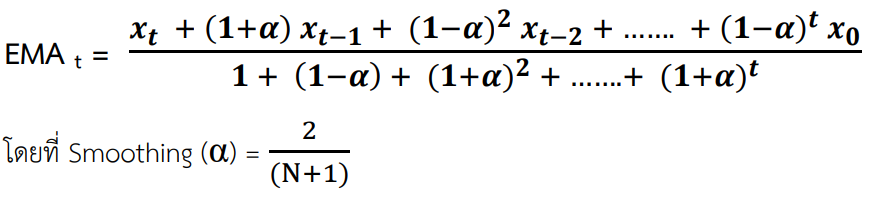

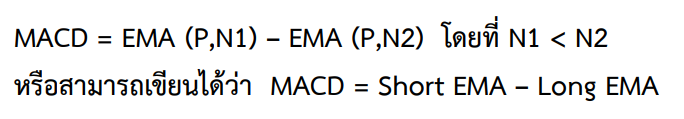

In [18]:
# Function to calculate the Moving Average Convergence Divergence (MACD)
def calculate_macd(index_price_df,
                   period_short = 12,
                   period_long = 26,
                   signal_line = 0):

    ############################################################################

    ### Calculate MACD from EMA short and EMA long

    # Create a copy of the input DataFrame
    MACD_df = index_price_df.copy()

    # Calculate MACD from EMA short (Shorter-period) and EMA long (Longer-period)
    MACD_df["EMA_short"] = index_price_df[type_price].ewm(span=period_short,
                                                          adjust=True,
                                                          min_periods=period_short).mean()
    MACD_df["EMA_long"] = index_price_df[type_price].ewm(span=period_long,
                                                         adjust=True,
                                                         min_periods=period_long).mean()
    MACD_df["MACD"] = MACD_df["EMA_short"] - MACD_df["EMA_long"]
    MACD_df.drop(["EMA_short", "EMA_long"], inplace=True, axis=1)

    ############################################################################

    ### Get Signal of MACD Rule 1 and MACD Rule 2

    # MACD Rule 1: MACD crosses zero
    if signal_line == 0:
        MACD_cross_zero = MACD_df.copy().dropna()
        MACD_cross_zero = MACD_cross_zero[["MACD"]]

        # Create new column for check previous day
        MACD_cross_zero.loc[:,"MACD_shift"] = MACD_cross_zero["MACD"].shift(1)

        # Update Buy signal: MACD crosses zero from below
        from_below = (MACD_cross_zero["MACD_shift"] < 0) & (MACD_cross_zero["MACD"] >= 0)
        MACD_cross_zero.loc[:,"buy_signal"] = np.where(from_below, 1, 0)

        # Update Sell signal: MACD crosses zero from above
        from_above = (MACD_cross_zero["MACD_shift"] > 0) & (MACD_cross_zero["MACD"] <= 0)
        MACD_cross_zero.loc[:,"sell_signal"] = np.where(from_above, 1, 0)

        # Drop MACD shift and Join table
        MACD_cross_zero.drop(["MACD", "MACD_shift"], axis=1, inplace=True)
        MACD_result_df = pd.merge(MACD_df, MACD_cross_zero, how="left", left_index=True, right_index=True)

    # MACD Rule 2: MACD crosses the signal_line-day EMA of the MACD
    elif signal_line > 0:
        EMA_crossover = MACD_df.copy().dropna()
        EMA_crossover = EMA_crossover[["MACD"]]
        EMA_crossover["EMA_of_MACD"] = EMA_crossover["MACD"].ewm(span=signal_line,
                                                                 adjust=True,
                                                                 min_periods=signal_line).mean()

        # Create new column for check previous day
        EMA_crossover.loc[:,"MACD_shift"] = EMA_crossover["MACD"].shift(1)
        EMA_crossover.loc[:,"EMA_of_MACD_shift"] = EMA_crossover["EMA_of_MACD"].shift(1)

        # Update Buy signal: MACD crosses EMA of the MACD from below
        from_below = (EMA_crossover["MACD_shift"] < EMA_crossover["EMA_of_MACD_shift"]) & (EMA_crossover["MACD"] >= EMA_crossover["EMA_of_MACD"])
        EMA_crossover.loc[:,"buy_signal"] = np.where(from_below, 1, 0)

        # Update Sell signal: MACD crosses EMA of the MACD from above
        from_above = (EMA_crossover["MACD_shift"] > EMA_crossover["EMA_of_MACD_shift"]) & (EMA_crossover["MACD"] <= EMA_crossover["EMA_of_MACD"])
        EMA_crossover.loc[:,"sell_signal"] = np.where(from_above, 1, 0)

        # Drop MACD and Join table
        EMA_crossover.drop(["MACD", "MACD_shift", "EMA_of_MACD_shift"], axis=1, inplace=True)
        MACD_result_df = pd.merge(MACD_df, EMA_crossover, how="left", left_index=True, right_index=True)

    else:
        raise ValueError("The signal_line must be greater than or equal 0.")

    ############################################################################

    return MACD_result_df

In [ ]:
# calculate_macd(index_price_df=index_price_dict["^BSESN"])

In [ ]:
# calculate_macd(index_price_df=index_price_dict["^BSESN"], signal_line=9)

## Define the function for Relative Strength Index (RSI) Strategy

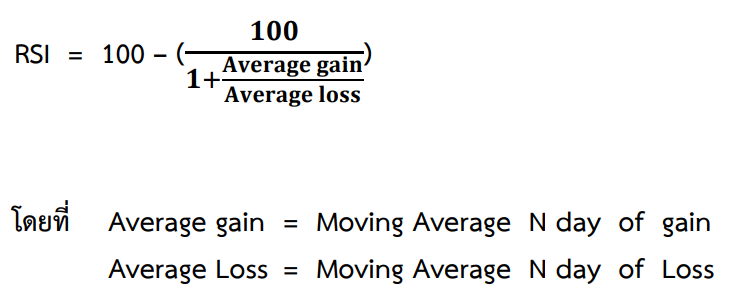

In [19]:
# Function to calculate the Relative Strength Index (RSI)
def calculate_rsi(index_price_df,
                  period = 14,
                  centerline = True,
                  os = None,
                  ob = None,
                  price = type_price):

    ############################################################################

    if not isinstance(centerline, bool):
        raise ValueError("centerline must be a Boolean value.")

    if ob is not None:
        if not (ob >= 60 and ob <= 90):
            raise ValueError("ob must be a float between 60 and 90.")

    if os is not None:
        if not (os >= 10 and os <= 40):
            raise ValueError("os must be a float between 10 and 40.")

    if centerline is True and (ob is not None or os is not None):
        raise ValueError("You cannot specify centerline along with ob or os.")

    if ob is not None and os is None:
        raise ValueError("If you specify ob, you must also specify os.")

    if os is not None and ob is None:
        raise ValueError("If you specify os, you must also specify ob.")

    if os is not None and ob is not None and centerline is not False:
        raise ValueError("If you specify os and ob, centerline must be False.")

    ############################################################################

    ### Calculate RSI

    # Create a copy of the input DataFrame
    RSI_df = index_price_df.copy()

    # Calculate the price change between consecutive days
    RSI_df["price_change"] = RSI_df[price].diff()
    RSI_df.dropna(subset=["price_change"], inplace=True)

    # Separate gains and losses based on price changes
    RSI_df.loc[:,"gain"] = np.where(RSI_df["price_change"] > 0, RSI_df["price_change"], 0)
    RSI_df.loc[:,"loss"] = np.where(RSI_df["price_change"] < 0, -RSI_df["price_change"], 0)

    # Calculate average gain and average loss by moving average
    RSI_df.loc[:,"avg_gain"] = RSI_df["gain"].rolling(window=period, min_periods=period).mean()
    RSI_df.loc[:,"avg_loss"] = RSI_df["loss"].rolling(window=period, min_periods=period).mean()

    # Calculate RSI from average gain and average loss for find buy and sell signal
    RSI_df.loc[:,"RSI"] = np.where(RSI_df["avg_loss"] != 0,
                                   100 - (100 / (1 + (RSI_df["avg_gain"] / RSI_df["avg_loss"]))),
                                   100)

    # Drop Gain, Loss, Average Gain, and Average Loss columns used for calculations
    RSI_df.drop(["price_change", "gain", "loss", "avg_gain", "avg_loss"], inplace=True, axis=1)

    ############################################################################

    ### Get Signal of RSI Rule 3 and RSI Rule 4

    # RSI Rule 3: RSI crosses the centerline
    if centerline == True:
        RSI_cross_center = RSI_df.copy().dropna()
        RSI_cross_center = RSI_cross_center[["RSI"]]

        # Create new column for check previous day
        RSI_cross_center.loc[:,"RSI_shift"] = RSI_cross_center["RSI"].shift(1)

        # Update Buy signal: RSI crosses the centerline from below
        from_below = (RSI_cross_center["RSI_shift"] < 50) & (RSI_cross_center["RSI"] >= 50)
        RSI_cross_center.loc[:,"buy_signal"] = np.where(from_below, 1, 0)

        # Update Sell signal: RSI crosses the centerline from above
        from_above = (RSI_cross_center["RSI_shift"] > 50) & (RSI_cross_center["RSI"] <= 50)
        RSI_cross_center.loc[:,"sell_signal"] = np.where(from_above, 1, 0)

        # Drop RSI and Join table
        RSI_cross_center.drop(["RSI", "RSI_shift"], axis=1, inplace=True)
        RSI_result_df = pd.merge(RSI_df, RSI_cross_center, how="left", left_index=True, right_index=True)

    # RSI Rule 4: RSI crosses the oversold and overbought
    elif centerline == False:
        RSI_cross_osob = RSI_df.copy().dropna()
        RSI_cross_osob = RSI_cross_osob[["RSI"]]

        # Create new column for check previous day
        RSI_cross_osob.loc[:,"RSI_shift"] = RSI_cross_osob["RSI"].shift(1)

        # Update Buy signal: RSI falls below oversold zone (RSI < os value) and rises above os value again
        from_below = (RSI_cross_osob["RSI_shift"] < os) & (RSI_cross_osob["RSI"] >= os)
        RSI_cross_osob.loc[:,"buy_signal"] = np.where(from_below, 1, 0)

        # Update Sell signal: RSI rises abover overbought zone (RSI > ob value) and falls below ob value again
        from_above = (RSI_cross_osob["RSI_shift"] > ob) & (RSI_cross_osob["RSI"] <= ob)
        RSI_cross_osob.loc[:,"sell_signal"] = np.where(from_above, 1, 0)

        # Drop RSI and Join table
        RSI_cross_osob.drop(["RSI", "RSI_shift"], axis=1, inplace=True)
        RSI_result_df = pd.merge(RSI_df, RSI_cross_osob, how="left", left_index=True, right_index=True)

    else:
        raise ValueError("Please enter centerline or (os and ob) again")

    ############################################################################

    return RSI_result_df

# Utility function for Indicator Trading Rules

## Define the function Don't buy/sell for 10 days after the buy/sell signal for Indicator Trading Rules

In [20]:
def adjust_signal(indicator_df):

    # Check if there is a buy and sell signal, Replace the next 10 rows in a buy_signal and sell_signal columns with 0 (no signal)
    for i in range(0,len(indicator_df)-10):
        if (indicator_df["buy_signal"].iloc[i] == 1) | (indicator_df["sell_signal"].iloc[i] == 1):
            """ Reset buy and sell signals in the next 10 days """
            indicator_df["buy_signal"].iloc[i+1:i+11] = 0
            indicator_df["sell_signal"].iloc[i+1:i+11] = 0

    # Replace the last 10 rows in a buy_signal and sell_signal columns with 0
    indicator_df["buy_signal"].iloc[len(indicator_df)-10:len(indicator_df)] = 0
    indicator_df["sell_signal"].iloc[len(indicator_df)-10:len(indicator_df)] = 0

    return indicator_df

## Define the function to calculate Log Return for Indicator Trading Rules

In [21]:
# Define a function to calculate strategy log returns
def calculate_trading_rules_log_return(indicator_df,
                                       price=type_price):

    # Create a copy of the input DataFrame and remove any rows with missing values
    log_return_df = indicator_df.copy()

    # log_return_df.dropna(inplace=True) # don't use this function because it causes a warning.
    log_return_df = log_return_df.loc[~log_return_df.isna().all(axis=1)] # drop by any column (by .all) isna = True

    # Shift data 10 days
    log_return_df["price_shift"] = log_return_df[price].shift(-10)

    # Calculate Buy and Sell Log Returns
    log_return_df.loc[:,"buy_log_return"] = np.log(log_return_df["price_shift"] / log_return_df[price]) * log_return_df["buy_signal"]
    log_return_df.loc[:,"sell_log_return"] = np.log(log_return_df["price_shift"] / log_return_df[price]) * (-1 * log_return_df["sell_signal"])
    log_return_df = log_return_df[["buy_log_return", "sell_log_return"]]

    # Merge the calculated log returns back to the original DataFrame based on index
    result_df = pd.merge(indicator_df, log_return_df, how="left", left_index=True, right_index=True)

    return result_df

## Define the function for Parameter Tuning of each rules

Constrain for find the best parameters. \
1. Maximum 10-days log return
2. Every year there must be at least 1 buy signal or 1 sell signal.

In [22]:
def parameter_turning(df, rule=1):

    # Initialize an empty list to store parameter combinations of trading rules
    all_parameter = []

    #############################################################################################################################################################

    # Check if the rule is 1
    if rule == 1:
        # Loop through different values for period_short, period_long
        for period_short in range(10, 81):
            for period_long in range(period_short + 10, 151):

                # Calculate MACD and adjust signals
                macd_df = calculate_macd(df, period_short=period_short, period_long=period_long, signal_line=0)
                macd_df = adjust_signal(macd_df)
                macd_df = calculate_trading_rules_log_return(macd_df)

                # Manipulate data for check constrain
                macd_df.reset_index(inplace=True)
                macd_df["Year"] = macd_df["Date"].dt.year

                # Calculate the mean buy and sell log returns
                buy_mean = macd_df.loc[macd_df["buy_log_return"] != 0, "buy_log_return"].mean()
                sell_mean = macd_df.loc[macd_df["sell_log_return"] != 0, "sell_log_return"].mean()
                mean = buy_mean + sell_mean

                # Check every year there must be at least 1 buy signal or 1 sell signal.
                group_year = macd_df.groupby("Year").agg({"buy_signal": sum, "sell_signal": sum})
                if (sum(group_year["buy_signal"] == 0) == 0) | (sum(group_year["sell_signal"] == 0) == 0) :
                    constrain_2 = True
                else:
                    constrain_2 = False

                # Create a parameter list and add it to the list of all parameters
                parameter = [period_short, period_long, 0, mean, constrain_2]
                all_parameter.append(parameter)

        # Convert the list of each parameters into a DataFrame
        all_parameter_df = pd.DataFrame(all_parameter, columns=["period_short", "period_long", "signal_line", "mean_return", "constrain_2"])

        # Find the parameter combination
        all_parameter_df = all_parameter_df[all_parameter_df["constrain_2"] == True]
        max_ret = all_parameter_df[all_parameter_df["mean_return"] == all_parameter_df["mean_return"].max()]
        period_short = max_ret["period_short"].values[0]
        period_long = max_ret["period_long"].values[0]
        signal_line = max_ret["signal_line"].values[0]
        mean_return = max_ret["mean_return"].values[0]

        # Return the best parameter combination
        return period_short, period_long, signal_line, mean_return

    #############################################################################################################################################################

    # Check if the rule is 2
    elif rule == 2:
        # Loop through different values for period_short, period_long, signal_line
        for period_short in range(10, 81):
            for period_long in range(period_short + 10, 151):
                for signal_line in range(5, 11):

                    # Calculate MACD and adjust signals
                    macd_df = calculate_macd(df, period_short=period_short, period_long=period_long, signal_line=signal_line)
                    macd_df = adjust_signal(macd_df)
                    macd_df = calculate_trading_rules_log_return(macd_df)

                    # Manipulate data for check constrain
                    macd_df.reset_index(inplace=True)
                    macd_df["Year"] = macd_df["Date"].dt.year

                    # Calculate the mean buy and sell log returns
                    buy_mean = macd_df.loc[macd_df["buy_log_return"] != 0, "buy_log_return"].mean()
                    sell_mean = macd_df.loc[macd_df["sell_log_return"] != 0, "sell_log_return"].mean()
                    mean = buy_mean + sell_mean

                    # Check every year there must be at least 1 buy signal or 1 sell signal.
                    group_year = macd_df.groupby("Year").agg({"buy_signal": sum, "sell_signal": sum})
                    if (sum(group_year["buy_signal"] == 0) == 0) | (sum(group_year["sell_signal"] == 0) == 0) :
                        constrain_2 = True
                    else:
                        constrain_2 = False

                    # Create a parameter list and add it to the list of all parameters
                    parameter = [period_short, period_long, signal_line, mean, constrain_2]
                    all_parameter.append(parameter)

        # Convert the list of each parameters into a DataFrame
        all_parameter_df = pd.DataFrame(all_parameter, columns=["period_short", "period_long", "signal_line", "mean_return", "constrain_2"])

        # Find the parameter combination
        all_parameter_df = all_parameter_df[all_parameter_df["constrain_2"] == True]
        max_ret = all_parameter_df[all_parameter_df["mean_return"] == all_parameter_df["mean_return"].max()]
        period_short = max_ret["period_short"].values[0]
        period_long = max_ret["period_long"].values[0]
        signal_line = max_ret["signal_line"].values[0]
        mean_return = max_ret["mean_return"].values[0]

        # Return the best parameter combination
        return period_short, period_long, signal_line, mean_return

    #############################################################################################################################################################

    # Check if the rule is 3
    elif rule == 3:
        # Loop through different values for period
        for period in range(7, 81):

            # Calculate RSI and adjust signals
            rsi_df = calculate_rsi(df, period=period, centerline=True)
            rsi_df = adjust_signal(rsi_df)
            rsi_df = calculate_trading_rules_log_return(rsi_df)

            # Manipulate data for check constrain
            rsi_df.reset_index(inplace=True)
            rsi_df["Year"] = rsi_df["Date"].dt.year

            # Calculate the mean buy and sell log returns
            buy_mean = rsi_df.loc[rsi_df["buy_log_return"] != 0, "buy_log_return"].mean()
            sell_mean = rsi_df.loc[rsi_df["sell_log_return"] != 0, "sell_log_return"].mean()
            mean = buy_mean + sell_mean

            # Check every year there must be at least 1 buy signal or 1 sell signal.
            group_year = rsi_df.groupby("Year").agg({"buy_signal": sum, "sell_signal": sum})
            if (sum(group_year["buy_signal"] == 0) == 0) | (sum(group_year["sell_signal"] == 0) == 0) :
                constrain_2 = True
            else:
                constrain_2 = False

            # Create a parameter list and add it to the list of all parameters
            parameter = [period, mean, constrain_2]
            all_parameter.append(parameter)

        # Convert the list of each parameters into a DataFrame
        all_parameter_df = pd.DataFrame(all_parameter, columns=["period", "mean_return", "constrain_2"])

        # Find the parameter combination
        all_parameter_df = all_parameter_df[all_parameter_df["constrain_2"] == True]
        max_ret = all_parameter_df[all_parameter_df["mean_return"] == all_parameter_df["mean_return"].max()]
        period = max_ret["period"].values[0]
        mean_return = max_ret["mean_return"].values[0]

        # Return the best parameter combination
        return period, mean_return

    #############################################################################################################################################################

    # Check if the rule is 4
    elif rule == 4:
        # Loop through different values for period, os, ob
        for period in range(7, 81):
            for os, ob in zip([20, 30], [80, 70]):

                    # Calculate RSI and adjust signals
                    rsi_df = calculate_rsi(df, period=period, centerline=False, os=os, ob=ob)
                    rsi_df = adjust_signal(rsi_df)
                    rsi_df = calculate_trading_rules_log_return(rsi_df)

                    # Manipulate data for check constrain
                    rsi_df.reset_index(inplace=True)
                    rsi_df["Year"] = rsi_df["Date"].dt.year

                    # Calculate the mean buy and sell log returns
                    buy_mean = rsi_df.loc[rsi_df["buy_log_return"] != 0, "buy_log_return"].mean()
                    sell_mean = rsi_df.loc[rsi_df["sell_log_return"] != 0, "sell_log_return"].mean()
                    mean = buy_mean + sell_mean

                    # Check every year there must be at least 1 buy signal or 1 sell signal.
                    group_year = rsi_df.groupby("Year").agg({"buy_signal": sum, "sell_signal": sum})
                    if (sum(group_year["buy_signal"] == 0) == 0) | (sum(group_year["sell_signal"] == 0) == 0) :
                        constrain_2 = True
                    else:
                        constrain_2 = False

                    # Create a parameter list and add it to the list of all parameters
                    parameter = [period, os, ob, mean, constrain_2]
                    all_parameter.append(parameter)

        # Convert the list of each parameters into a DataFrame
        all_parameter_df = pd.DataFrame(all_parameter, columns=["period", "os", "ob", "mean_return", "constrain_2"])
        all_parameter_df = x.copy()

        # Find the parameter combination
        all_parameter_df = all_parameter_df[all_parameter_df["constrain_2"] == True]
        max_ret = all_parameter_df[all_parameter_df["mean_return"] == all_parameter_df["mean_return"].max()]
        period = max_ret["period"].values[0]
        os = max_ret["os"].values[0]
        ob = max_ret["ob"].values[0]
        mean_return = max_ret["mean_return"].values[0]

        # Return the best parameter combination
        return period, os, ob, mean_return

## Define the function to Create Summary Table for Indicator Trading Rules

In [15]:
def summary_table_func(buy_and_hold_dict,
                       indicator_dict,
                       parameter_dict,
                       rule=1,
                       symbols=index_symbols,
                       names=index_names):

    # Create an empty summary table as a dictionary.
    summary_table = {"Symbol": symbols,  # Column for index symbols
                     "Sample Period (2013-2023)": names}  # Column for index names
    summary_table = pd.DataFrame(summary_table) # Convert the dictionary to a Pandas DataFrame

    # Iterate through the dictionary of index data for each symbol.
    for symbol, indicator_df, buy_and_hold_df, parameter_list in zip(indicator_dict.keys(), indicator_dict.values(), buy_and_hold_dict.values(), parameter_dict.values()):

        indicator_df = indicator_df.dropna()

        ####################################################################################

        # Find the row in the summary table where 'Symbol' matches the current symbol.
        condition = summary_table["Symbol"] == symbol

        ####################################################################################

        # slice each technical parameter of each index for add parameter to summary table
        if (rule == 1) | (rule == 2):
            period_short = parameter_list[0]
            period_long = parameter_list[1]
            signal_line = parameter_list[2]
            summary_table.loc[condition, "Parameter"] = "MACD(" + str(period_short) + "," + str(period_long) + "," + str(signal_line) + ")"
        elif (rule == 3):
            period = parameter_list[0]
            summary_table.loc[condition, "Parameter"] = "RSI(" + str(period) + ",50)"
        elif (rule == 4):
            period = parameter_list[0]
            os = parameter_list[1]
            ob = parameter_list[2]
            summary_table.loc[condition, "Parameter"] = "RSI(" + str(period) + "," + str(os) + "/" + str(ob) + ")"

        ####################################################################################

        # Find number of buy and sell signal
        summary_table.loc[condition, "N(Buy)"] = indicator_df["buy_signal"].sum()
        summary_table.loc[condition, "N(Sell)"] = indicator_df["sell_signal"].sum()

        ####################################################################################

        summary_table.loc[condition, "Buy&Hold"] = round(buy_and_hold_df["log_return"].mean(), 5)

        ####################################################################################

        indicator_buy_mean = indicator_df.loc[indicator_df["buy_log_return"] != 0, "buy_log_return"].mean()

        ### t-Test two sample assuming unequal variances
        ### Between average ten-day return of trading rules for buy signal and average ten-day return of Buy and Hold Strategy
        # Ho: Mue(buy) = Mue(buy&hold)
        # Ha: Mue(buy) > Mue(buy&hold)
        # Statistical Significant if p-value of right tail less than 0.05

        t_buy, t_pvalue_buy = stats.ttest_ind(indicator_df.loc[indicator_df["buy_log_return"] != 0, "buy_log_return"],
                                              buy_and_hold_df["log_return"],
                                              equal_var=False,
                                              alternative="greater")

        if (t_pvalue_buy < 0.05): # reject Ho at alpha = 0.05
            summary_table.loc[condition, "Buy"] = str(round(indicator_buy_mean, 5)) + "**" + "(" + str(round(t_buy, 3)) + ")"
        elif (t_pvalue_buy < 0.10): # reject Ho at alpha = 0.10
            summary_table.loc[condition, "Buy"] = str(round(indicator_buy_mean, 5)) + "*" + "(" + str(round(t_buy, 3)) + ")"
        else: # accept Ho
            summary_table.loc[condition, "Buy"] = str(round(indicator_buy_mean, 5)) + "(" + str(round(t_buy, 3)) + ")"

        ####################################################################################

        indicator_sell_mean = indicator_df.loc[indicator_df["sell_log_return"] != 0, "sell_log_return"].mean()

        ### t-Test two sample assuming unequal variances
        ### Between average ten-day return of trading rules for sell signal and average ten-day return of Buy and Hold Strategy
        # Ho: Mue(sell) = Mue(buy&hold)
        # Ha: Mue(sell) > Mue(buy&hold)
        # Statistical Significant if p-value of right tail less than 0.05

        t_sell, t_pvalue_sell = stats.ttest_ind(indicator_df.loc[indicator_df["sell_log_return"] != 0, "sell_log_return"],
                                                buy_and_hold_df["log_return"],
                                                equal_var=False,
                                                alternative="greater")

        if (t_pvalue_sell < 0.05): # reject Ho at alpha = 0.05
            summary_table.loc[condition, "Sell"] = str(round(indicator_sell_mean, 5)) + "**" + "(" + str(round(t_sell, 3)) + ")"
        elif (t_pvalue_sell < 0.10): # reject Ho at alpha = 0.10
            summary_table.loc[condition, "Sell"] = str(round(indicator_sell_mean, 5)) + "*" + "(" + str(round(t_sell, 3)) + ")"
        else: # accept Ho
            summary_table.loc[condition, "Sell"] = str(round(indicator_sell_mean, 5)) + "(" + str(round(t_sell, 3)) + ")"

        ####################################################################################

        ### Find Percentage when ten-days return is profit (greater than 0)

        summary_table.loc[condition, "Buy>0"] = round(indicator_df.loc[indicator_df["buy_log_return"] > 0, "buy_log_return"].count() / indicator_df.loc[indicator_df["buy_log_return"] != 0, "buy_log_return"].count(), 3)
        summary_table.loc[condition, "Sell>0"] = round(indicator_df.loc[indicator_df["sell_log_return"] > 0, "sell_log_return"].count() / indicator_df.loc[indicator_df["sell_log_return"] != 0, "sell_log_return"].count(), 3)

        ####################################################################################

        # Combine Buy Log return and Sell Log return in the same column named buy_sell_log_return
        buy_sell_df = pd.DataFrame(indicator_df.loc[:,"buy_log_return"] + indicator_df.loc[:,"sell_log_return"], columns=["buy_sell_log_return"])
        indicator_buy_sell_mean = buy_sell_df.loc[buy_sell_df["buy_sell_log_return"] != 0, "buy_sell_log_return"].mean()

        ### t-Test two sample assuming unequal variances
        ### Between average ten-day return of trading rules for buy and sell signal and average ten-day return of Buy and Hold Strategy
        # Ho: Mue(buy+sell) - Mue(buy & hold) = 0
        # Ha: Mue(buy+sell) - Mue(buy & hold) > 0
        # Statistical Significant if p-value of right tail less than 0.05

        t_buy_sell, t_pvalue_buy_sell = stats.ttest_ind(buy_sell_df.loc[buy_sell_df["buy_sell_log_return"] != 0, "buy_sell_log_return"],
                                                        buy_and_hold_df["log_return"],
                                                        equal_var=False,
                                                        alternative="greater")

        if (t_pvalue_buy_sell < 0.05): # reject Ho at alpha = 0.05
            summary_table.loc[condition, "Buy&Sell>Buy&Hold"] = str(round(indicator_buy_sell_mean, 5)) + "**" + "(" + str(round(t_buy_sell, 3)) + ")"
        elif (t_pvalue_buy_sell < 0.10): # reject Ho at alpha = 0.10
            summary_table.loc[condition, "Buy&Sell>Buy&Hold"] = str(round(indicator_buy_sell_mean, 5)) + "*" + "(" + str(round(t_buy_sell, 3)) + ")"
        else: # accept Ho
            summary_table.loc[condition, "Buy&Sell>Buy&Hold"] = str(round(indicator_buy_sell_mean, 5)) + "(" + str(round(t_buy_sell, 3)) + ")"

        ####################################################################################

    # Set the "Symbol" column to index names from the summary table.
    summary_table.set_index("Symbol", inplace=True)

    return summary_table

## RSI Rule 4: RSI(7,30/70) crosses the oversold and overbought

In [ ]:
# parameter RSI(7,30/70) Rule 4
para_list = [7,30,70]

rsi_dict_para_7_30_70 = {
    '^BSESN': para_list,
    '^N225': para_list,
    '^HSI': para_list,
    '399001.SZ': para_list,
    '000001.SS': para_list,
    '^NSEI': para_list,
    '^KS11': para_list,
    '^TWII': para_list,
    '^STI': para_list,
    '^SET.BK': para_list
}

In [ ]:
# Set Rule and Strategy
rule = 4
centerline = False

# Create a dictionary to store RSI DataFrames for different symbols
rsi_dict_7_30_70 = {}

for symbol, index_price_df, parameter_list in zip(index_price_dict.keys(), index_price_dict.values(), rsi_dict_para_7_30_70.values()):

    # slice each macd parameter of each index
    period = parameter_list[0]
    os = parameter_list[1]
    ob = parameter_list[2]

    # Iterate through symbols and calculate RSI and Buy/Sell signal for each index
    rsi_dict_7_30_70[symbol] = calculate_rsi(index_price_df,
                                             period = period,
                                             centerline = centerline,
                                             os = os,
                                             ob = ob,
                                             price=type_price)

    # Iterate through symbols and adjust buy and sell signal for each index
    rsi_dict_7_30_70[symbol] = adjust_signal(rsi_dict_7_30_70[symbol])

    # Iterate through symbols and calculate buy and sell log return for each index
    rsi_dict_7_30_70[symbol] = calculate_trading_rules_log_return(rsi_dict_7_30_70[symbol])

    print(f"Complete to create RSI Rule {rule} as RSI({period},{os}/{ob}) of {symbol}")

Complete to create RSI Rule 4 as RSI(7,30/70) of ^BSESN
Complete to create RSI Rule 4 as RSI(7,30/70) of ^N225
Complete to create RSI Rule 4 as RSI(7,30/70) of ^HSI
Complete to create RSI Rule 4 as RSI(7,30/70) of 399001.SZ
Complete to create RSI Rule 4 as RSI(7,30/70) of 000001.SS
Complete to create RSI Rule 4 as RSI(7,30/70) of ^NSEI
Complete to create RSI Rule 4 as RSI(7,30/70) of ^KS11
Complete to create RSI Rule 4 as RSI(7,30/70) of ^TWII
Complete to create RSI Rule 4 as RSI(7,30/70) of ^STI
Complete to create RSI Rule 4 as RSI(7,30/70) of ^SET.BK


In [ ]:
# Set Rule and Strategy
rule = 4

rsi_summary_table_7_30_70 = summary_table_func(buy_and_hold_dict = buy_and_hold_dict,
                                               indicator_dict = rsi_dict_7_30_70,
                                               symbols = index_symbols,
                                               parameter_dict = rsi_dict_para_7_30_70,
                                               rule = rule,
                                               names = index_names)
rsi_summary_table_7_30_70

,Sample Period (2013-2023),Parameter,N(Buy),N(Sell),Buy&Hold,Buy,Sell,Buy>0,Sell>0,Buy&Sell>Buy&Hold
Symbol,,,,,,,,,,
^BSESN,"Bombay Stock Exchange, India","RSI(7,30/70)",51.0,101.0,0.00490,0.01081(1.254),-0.00569(-3.483),0.608,0.356,-0.00015(-1.89)
^N225,"Tokyo Stock Exchange, Japan","RSI(7,30/70)",55.0,99.0,0.00342,0.00872(0.977),3e-05(-0.974),0.636,0.485,0.00314(-0.094)
^HSI,"Hong Kong Stock Exchange, Hong Kong","RSI(7,30/70)",75.0,74.0,-0.00107,0.00389(0.892),0.00733**(1.847),0.560,0.500,0.0056**(1.835)
399001.SZ,"Shenzhen Stock Exchange, China","RSI(7,30/70)",67.0,80.0,0.00065,-0.0032(-0.864),-0.002(-0.431),0.478,0.450,-0.00255(-0.804)
000001.SS,"Shanghai Stock Exchange, China","RSI(7,30/70)",72.0,85.0,0.00142,0.00154(0.033),0.00354(0.389),0.542,0.459,0.00262(0.354)
^NSEI,"National Stock Exchange, India","RSI(7,30/70)",51.0,99.0,0.00492,0.00847(0.73),-0.00733(-4.067),0.667,0.333,-0.00196(-2.559)
^KS11,"Korea Exchange, South Korea","RSI(7,30/70)",64.0,85.0,0.00095,-0.00033(-0.235),-0.00393(-1.415),0.516,0.412,-0.00238(-1.084)
^TWII,"Taiwan Stock Exchange, Taiwan","RSI(7,30/70)",56.0,95.0,0.00283,0.00068(-0.348),-0.00284(-1.838),0.643,0.368,-0.00153(-1.445)
^STI,"Singapore Exchange, Singapore","RSI(7,30/70)",71.0,76.0,0.00008,0.00682**(2.016),0.00575**(1.976),0.592,0.618,0.00626**(2.78)


In [ ]:
rsi_summary_table_7_30_70.to_excel("rsi_summary_table_7_30_70.xlsx")

## RSI Rule 4: RSI(14,30/70) crosses the oversold and overbought

In [ ]:
# parameter RSI(14,30/70) Rule 4
para_list = [14,30,70]

rsi_dict_para_14_30_70 = {
    '^BSESN': para_list,
    '^N225': para_list,
    '^HSI': para_list,
    '399001.SZ': para_list,
    '000001.SS': para_list,
    '^NSEI': para_list,
    '^KS11': para_list,
    '^TWII': para_list,
    '^STI': para_list,
    '^SET.BK': para_list
}

In [ ]:
# Set Rule and Strategy
rule = 4
centerline = False

# Create a dictionary to store RSI DataFrames for different symbols
rsi_dict_14_30_70 = {}

for symbol, index_price_df, parameter_list in zip(index_price_dict.keys(), index_price_dict.values(), rsi_dict_para_14_30_70.values()):

    # slice each macd parameter of each index
    period = parameter_list[0]
    os = parameter_list[1]
    ob = parameter_list[2]

    # Iterate through symbols and calculate RSI and Buy/Sell signal for each index
    rsi_dict_14_30_70[symbol] = calculate_rsi(index_price_df,
                                              period = period,
                                              centerline = centerline,
                                              os = os,
                                              ob = ob,
                                              price=type_price)

    # Iterate through symbols and adjust buy and sell signal for each index
    rsi_dict_14_30_70[symbol] = adjust_signal(rsi_dict_14_30_70[symbol])

    # Iterate through symbols and calculate buy and sell log return for each index
    rsi_dict_14_30_70[symbol] = calculate_trading_rules_log_return(rsi_dict_14_30_70[symbol])

    print(f"Complete to create RSI Rule {rule} as RSI({period},{os}/{ob}) of {symbol}")

Complete to create RSI Rule 4 as RSI(14,30/70) of ^BSESN
Complete to create RSI Rule 4 as RSI(14,30/70) of ^N225
Complete to create RSI Rule 4 as RSI(14,30/70) of ^HSI
Complete to create RSI Rule 4 as RSI(14,30/70) of 399001.SZ
Complete to create RSI Rule 4 as RSI(14,30/70) of 000001.SS
Complete to create RSI Rule 4 as RSI(14,30/70) of ^NSEI
Complete to create RSI Rule 4 as RSI(14,30/70) of ^KS11
Complete to create RSI Rule 4 as RSI(14,30/70) of ^TWII
Complete to create RSI Rule 4 as RSI(14,30/70) of ^STI
Complete to create RSI Rule 4 as RSI(14,30/70) of ^SET.BK


In [ ]:
# Set Rule and Strategy
rule = 4

rsi_summary_table_14_30_70 = summary_table_func(buy_and_hold_dict = buy_and_hold_dict,
                                                indicator_dict = rsi_dict_14_30_70,
                                                symbols = index_symbols,
                                                parameter_dict = rsi_dict_para_14_30_70,
                                                rule = rule,
                                                names = index_names)
rsi_summary_table_14_30_70

,Sample Period (2013-2023),Parameter,N(Buy),N(Sell),Buy&Hold,Buy,Sell,Buy>0,Sell>0,Buy&Sell>Buy&Hold
Symbol,,,,,,,,,,
^BSESN,"Bombay Stock Exchange, India","RSI(14,30/70)",32.0,63.0,0.00490,0.01078(0.975),-0.00493(-3.031),0.594,0.365,0.00036(-1.476)
^N225,"Tokyo Stock Exchange, Japan","RSI(14,30/70)",29.0,61.0,0.00342,0.00836(0.657),-0.00203(-1.388),0.552,0.426,0.00132(-0.575)
^HSI,"Hong Kong Stock Exchange, Hong Kong","RSI(14,30/70)",51.0,55.0,-0.00107,0.00266(0.58),0.00385(1.024),0.569,0.509,0.00328(1.088)
399001.SZ,"Shenzhen Stock Exchange, China","RSI(14,30/70)",40.0,55.0,0.00065,-0.01521(-2.487),-0.00331(-0.468),0.500,0.400,-0.00832(-1.591)
000001.SS,"Shanghai Stock Exchange, China","RSI(14,30/70)",43.0,61.0,0.00142,-0.00043(-0.434),-0.00906(-1.864),0.581,0.410,-0.00549(-1.821)
^NSEI,"National Stock Exchange, India","RSI(14,30/70)",32.0,65.0,0.00492,0.00807(0.557),-0.00596(-3.475),0.625,0.385,-0.00133(-2.151)
^KS11,"Korea Exchange, South Korea","RSI(14,30/70)",38.0,57.0,0.00095,-0.00186(-0.27),-0.00711(-2.639),0.658,0.386,-0.00501(-1.311)
^TWII,"Taiwan Stock Exchange, Taiwan","RSI(14,30/70)",43.0,68.0,0.00283,-0.00317(-0.936),-0.00367(-1.952),0.581,0.426,-0.00348(-1.954)
^STI,"Singapore Exchange, Singapore","RSI(14,30/70)",51.0,52.0,0.00008,0.00896**(2.149),0.00846**(2.682),0.647,0.635,0.00871**(3.312)


In [ ]:
rsi_summary_table_14_30_70.to_excel("rsi_summary_table_14_30_70.xlsx")

## RSI Rule 4: RSI(21,30/70) crosses the oversold and overbought

In [ ]:
# parameter RSI(21,30/70) Rule 4
para_list = [21,30,70]

rsi_dict_para_21_30_70 = {
    '^BSESN': para_list,
    '^N225': para_list,
    '^HSI': para_list,
    '399001.SZ': para_list,
    '000001.SS': para_list,
    '^NSEI': para_list,
    '^KS11': para_list,
    '^TWII': para_list,
    '^STI': para_list,
    '^SET.BK': para_list
}

In [ ]:
# Set Rule and Strategy
rule = 4
centerline = False

# Create a dictionary to store RSI DataFrames for different symbols
rsi_dict_21_30_70 = {}

for symbol, index_price_df, parameter_list in zip(index_price_dict.keys(), index_price_dict.values(), rsi_dict_para_21_30_70.values()):

    # slice each macd parameter of each index
    period = parameter_list[0]
    os = parameter_list[1]
    ob = parameter_list[2]

    # Iterate through symbols and calculate RSI and Buy/Sell signal for each index
    rsi_dict_21_30_70[symbol] = calculate_rsi(index_price_df,
                                              period = period,
                                              centerline = centerline,
                                              os = os,
                                              ob = ob,
                                              price=type_price)

    # Iterate through symbols and adjust buy and sell signal for each index
    rsi_dict_21_30_70[symbol] = adjust_signal(rsi_dict_21_30_70[symbol])

    # Iterate through symbols and calculate buy and sell log return for each index
    rsi_dict_21_30_70[symbol] = calculate_trading_rules_log_return(rsi_dict_21_30_70[symbol])

    print(f"Complete to create RSI Rule {rule} as RSI({period},{os}/{ob}) of {symbol}")

Complete to create RSI Rule 4 as RSI(21,30/70) of ^BSESN
Complete to create RSI Rule 4 as RSI(21,30/70) of ^N225
Complete to create RSI Rule 4 as RSI(21,30/70) of ^HSI
Complete to create RSI Rule 4 as RSI(21,30/70) of 399001.SZ
Complete to create RSI Rule 4 as RSI(21,30/70) of 000001.SS
Complete to create RSI Rule 4 as RSI(21,30/70) of ^NSEI
Complete to create RSI Rule 4 as RSI(21,30/70) of ^KS11
Complete to create RSI Rule 4 as RSI(21,30/70) of ^TWII
Complete to create RSI Rule 4 as RSI(21,30/70) of ^STI
Complete to create RSI Rule 4 as RSI(21,30/70) of ^SET.BK


In [ ]:
# Set Rule and Strategy
rule = 4

rsi_summary_table_21_30_70 = summary_table_func(buy_and_hold_dict = buy_and_hold_dict,
                                                indicator_dict = rsi_dict_21_30_70,
                                                symbols = index_symbols,
                                                parameter_dict = rsi_dict_para_21_30_70,
                                                rule = rule,
                                                names = index_names)
rsi_summary_table_21_30_70

,Sample Period (2013-2023),Parameter,N(Buy),N(Sell),Buy&Hold,Buy,Sell,Buy>0,Sell>0,Buy&Sell>Buy&Hold
Symbol,,,,,,,,,,
^BSESN,"Bombay Stock Exchange, India","RSI(21,30/70)",14.0,53.0,0.00490,0.00937(0.579),-0.01161(-4.048),0.571,0.321,-0.00722(-3.231)
^N225,"Tokyo Stock Exchange, Japan","RSI(21,30/70)",12.0,37.0,0.00342,0.00126(-0.235),-0.00346(-1.574),0.417,0.405,-0.00231(-1.436)
^HSI,"Hong Kong Stock Exchange, Hong Kong","RSI(21,30/70)",27.0,34.0,-0.00107,0.00184(0.362),-0.0045(-0.616),0.519,0.353,-0.00169(-0.131)
399001.SZ,"Shenzhen Stock Exchange, China","RSI(21,30/70)",23.0,29.0,0.00065,0.00406(0.361),0.00902(0.691),0.609,0.448,0.00683(0.78)
000001.SS,"Shanghai Stock Exchange, China","RSI(21,30/70)",24.0,31.0,0.00142,0.0048(0.426),0.00331(0.193),0.625,0.452,0.00396(0.392)
^NSEI,"National Stock Exchange, India","RSI(21,30/70)",12.0,52.0,0.00492,0.01195(0.785),-0.01189(-4.178),0.667,0.308,-0.00742(-3.209)
^KS11,"Korea Exchange, South Korea","RSI(21,30/70)",23.0,45.0,0.00095,-0.00145(-0.231),-0.00274(-0.736),0.609,0.444,-0.00231(-0.676)
^TWII,"Taiwan Stock Exchange, Taiwan","RSI(21,30/70)",24.0,51.0,0.00283,0.00377(0.107),-0.01006(-3.032),0.667,0.333,-0.00563(-2.068)
^STI,"Singapore Exchange, Singapore","RSI(21,30/70)",30.0,36.0,0.00008,0.00732*(1.386),0.00564*(1.392),0.667,0.556,0.0064**(1.961)


In [ ]:
rsi_summary_table_21_30_70.to_excel("rsi_summary_table_21_30_70.xlsx")

## RSI Rule 4: RSI crosses the oversold and overbought

In [ ]:
# # Parameter turning for finding the best parameters for RSI strategy
# rule = 4

# # Create a dictionary to store RSI parameters for different symbols
# rsi_dict_para_rule4_opt = {}

# # Iterate through symbols and Parameter turning for RSI signal for each index
# for symbol, index_price_df in index_price_dict.items():

#     # Call a function to find the optimal RSI parameters for the current symbol and rule
#     max_period, max_os, max_ob, max_mean_return = parameter_turning(index_price_df, rule = rule)

#     # Store the found RSI parameters in the dictionary for the current symbol
#     rsi_dict_para_rule4_opt[symbol] = [max_period, max_os, max_ob, max_mean_return]

#     # Print the results of the parameter tuning for the current symbol
#     print(f"Complete find best parameter of RSI Rule {rule} as RSI({max_period},{max_os}/{max_ob}) for {symbol} and achieved the highest average return of {round(max_mean_return, 6)}")

In [31]:
# After Optimize (Turning for Finding the best) parameter RSI Rule 4
rsi_dict_para_rule4_opt = {
    '^BSESN': [22, 30, 70, 0.007419352383202654],
    '^N225': [14, 20, 80, 0.030022706297901203],
    '^HSI': [17, 30, 70, 0.014298385111954335],
    '399001.SZ': [8, 20, 80, 0.014417614568758272],
    '000001.SS': [22, 30, 70, 0.016005294420931394],
    '^NSEI': [17, 30, 70, 0.010292536435049045],
    '^KS11': [7, 20, 80, 0.007377974603096775],
    '^TWII': [33, 30, 70, 0.019566240972918654],
    '^STI': [13, 20, 80, 0.027755139515745205],
    '^SET.BK': [15, 30, 70, 0.006679122681684172]
}

In [32]:
# Set Rule and Strategy
rule = 4
centerline = False

# Create a dictionary to store RSI DataFrames for different symbols
rsi_dict_rule4_opt = {}

for symbol, index_price_df, parameter_list in zip(index_price_dict.keys(), index_price_dict.values(), rsi_dict_para_rule4_opt.values()):

    # slice each macd parameter of each index
    max_period = parameter_list[0]
    max_os = parameter_list[1]
    max_ob = parameter_list[2]

    # Iterate through symbols and calculate RSI and Buy/Sell signal for each index
    rsi_dict_rule4_opt[symbol] = calculate_rsi(index_price_df,
                                               period = max_period,
                                               centerline = centerline,
                                               os = max_os,
                                               ob = max_ob,
                                               price=type_price)

    # Iterate through symbols and adjust buy and sell signal for each index
    rsi_dict_rule4_opt[symbol] = adjust_signal(rsi_dict_rule4_opt[symbol])

    # Iterate through symbols and calculate buy and sell log return for each index
    rsi_dict_rule4_opt[symbol] = calculate_trading_rules_log_return(rsi_dict_rule4_opt[symbol])

    print(f"Complete to create RSI Rule {rule} as RSI({max_period},{max_os}/{max_ob}) of {symbol}")

Complete to create RSI Rule 4 as RSI(22,30/70) of ^BSESN
Complete to create RSI Rule 4 as RSI(14,20/80) of ^N225
Complete to create RSI Rule 4 as RSI(17,30/70) of ^HSI
Complete to create RSI Rule 4 as RSI(8,20/80) of 399001.SZ
Complete to create RSI Rule 4 as RSI(22,30/70) of 000001.SS
Complete to create RSI Rule 4 as RSI(17,30/70) of ^NSEI
Complete to create RSI Rule 4 as RSI(7,20/80) of ^KS11
Complete to create RSI Rule 4 as RSI(33,30/70) of ^TWII
Complete to create RSI Rule 4 as RSI(13,20/80) of ^STI
Complete to create RSI Rule 4 as RSI(15,30/70) of ^SET.BK


In [ ]:
# rsi_dict_rule4_opt['^BSESN']

In [33]:
# Set Rule and Strategy
rule = 4

rsi_summary_table_rule4_opt = summary_table_func(buy_and_hold_dict = buy_and_hold_dict,
                                                 indicator_dict = rsi_dict_rule4_opt,
                                                 symbols = index_symbols,
                                                 parameter_dict = rsi_dict_para_rule4_opt,
                                                 rule = rule,
                                                 names = index_names)
rsi_summary_table_rule4_opt

,Sample Period (2013-2023),Parameter,N(Buy),N(Sell),Buy&Hold,Buy,Sell,Buy>0,Sell>0,Buy&Sell>Buy&Hold
Symbol,,,,,,,,,,
^BSESN,"Bombay Stock Exchange, India","RSI(22,30/70)",11.0,49.0,0.00490,0.01759(1.226),-0.01017(-3.538),0.727,0.388,-0.00508(-2.387)
^N225,"Tokyo Stock Exchange, Japan","RSI(14,20/80)",11.0,31.0,0.00342,0.03301**(2.426),-0.00299(-0.937),0.818,0.452,0.00644(0.471)
^HSI,"Hong Kong Stock Exchange, Hong Kong","RSI(17,30/70)",34.0,43.0,-0.00107,0.01186*(1.683),0.00244(0.649),0.647,0.465,0.0066**(1.675)
399001.SZ,"Shenzhen Stock Exchange, China","RSI(8,20/80)",48.0,53.0,0.00065,0.00892(1.223),0.0055(0.509),0.625,0.453,0.00712(1.086)
000001.SS,"Shanghai Stock Exchange, China","RSI(22,30/70)",23.0,36.0,0.00142,0.01609**(1.858),-9e-05(-0.164),0.783,0.444,0.00622(0.743)
^NSEI,"National Stock Exchange, India","RSI(17,30/70)",23.0,66.0,0.00492,0.01811**(2.015),-0.00782(-4.031),0.696,0.364,-0.00112(-1.92)
^KS11,"Korea Exchange, South Korea","RSI(7,20/80)",52.0,70.0,0.00095,0.00712(1.02),0.00025(-0.198),0.596,0.500,0.00318(0.677)
^TWII,"Taiwan Stock Exchange, Taiwan","RSI(33,30/70)",8.0,34.0,0.00283,0.02522*(1.835),-0.00566(-1.534),0.875,0.382,0.00022(-0.487)
^STI,"Singapore Exchange, Singapore","RSI(13,20/80)",26.0,39.0,0.00008,0.01865**(2.953),0.00911**(2.155),0.731,0.641,0.01292**(3.57)


In [34]:
rsi_summary_table_rule4_opt.to_excel("rsi_summary_table_rule4_opt.xlsx")